Data [[52, 42]] classification result: Jindo Dog
Distances: [[ 5.38516481  7.          8.54400375  8.94427191 10.77032961]], Neighbor indices: [[ 6 14 12 10  8]]


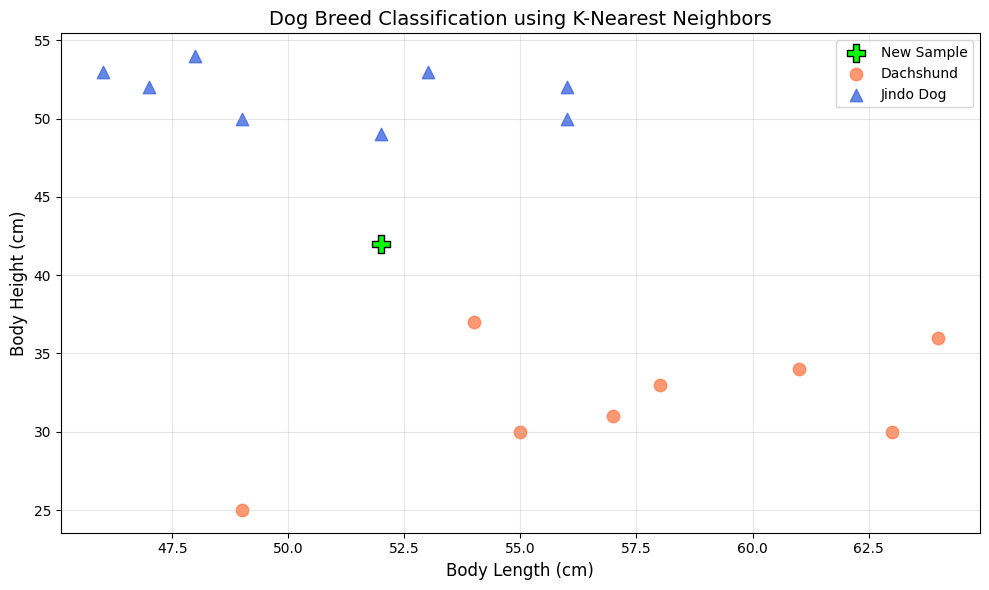

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Dog breed data: length and height measurements
dachshund_length = [55, 57, 64, 63, 58, 49, 54, 61]
dachshund_height = [30, 31, 36, 30, 33, 25, 37, 34]

jindo_length = [56, 47, 56, 46, 49, 53, 52, 48]
jindo_height = [52, 52, 50, 53, 50, 53, 49, 54]

# Prepare training data and labels
jindo_data = np.column_stack((jindo_length, jindo_height))
jindo_labels = np.ones(len(jindo_data))  # Label 1 for Jindo dogs

dachshund_data = np.column_stack((dachshund_length, dachshund_height))
dachshund_labels = np.zeros(len(dachshund_data))  # Label 0 for Dachshunds

# Combine all training data
training_data = np.concatenate((dachshund_data, jindo_data))
training_labels = np.concatenate((dachshund_labels, jindo_labels))

# New sample to classify
new_sample = [[52, 42]]
breed_mapping = {0: 'Dachshund', 1: 'Jindo Dog'}

# Configure and train KNN classifier
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(training_data, training_labels)

# Make prediction
prediction = knn_classifier.predict(new_sample)
print(f'Data {new_sample} classification result: {breed_mapping[prediction[0]]}')

# Analyze nearest neighbors
distances, neighbor_indices = knn_classifier.kneighbors(new_sample)
print(f'Distances: {distances}, Neighbor indices: {neighbor_indices}')

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(new_sample[0][0], new_sample[0][1], s=150, marker='P',
           c='lime', edgecolors='black', label='New Sample')
plt.scatter(dachshund_length, dachshund_height, c='coral',
           s=80, alpha=0.8, label='Dachshund')
plt.scatter(jindo_length, jindo_height, c='royalblue',
           marker='^', s=80, alpha=0.8, label='Jindo Dog')

plt.xlabel('Body Length (cm)', fontsize=12)
plt.ylabel('Body Height (cm)', fontsize=12)
plt.title('Dog Breed Classification using K-Nearest Neighbors', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()